**Linear Regression**


In [1]:
# Numpy for data management
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Pandas also for data management
import pandas as pd
import io
# Seaborn for plotting and styling
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

df2 = pd.read_csv('data_selection.csv',sep=',')
sns.set()
data=df2.to_numpy()
cols = ['No','year','month','day','hour','PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']

df2 = pd.DataFrame(data, columns=cols)
#sns.pairplot(df2)

**Linear Regression between CO and NO2**

In [2]:
x=df2['WSPM'].to_numpy()
x=np.reshape(x,(-1,1))
y=df2['O3'].to_numpy()

#x= data[:,13]
#y= data[:,5]

**a)** *Select two features in your dataset with more or less “linear‐like” scatterplot. Display the scatter‐plot, and make a comment on it.*

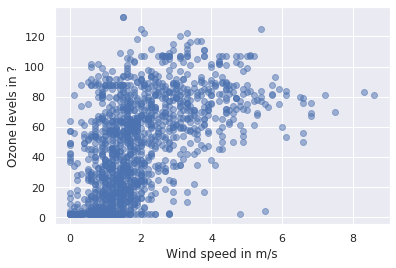

In [3]:
ax = sns.regplot(x=x, y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='Wind speed in m/s', 
       ylabel='Ozone levels in ?');

**b)** *Build a linear regression of one of the features over the other. Obtain a normal probability plot of the standardized residuals from this regression. Does the normal probability plot indicate acceptable normality, or is there any skewness? If a skewness, what is the type of it?*

In [4]:
from numpy.linalg import inv
from numpy.linalg import det
from numpy import dot

In [5]:

beta = np.linalg.lstsq(x, y)[0]
beta2 = dot(dot(inv(dot(x.T, x)),x.T),y) 
print(beta)
print(beta2)


[20.80505004]
[20.80505004]


/home/oran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


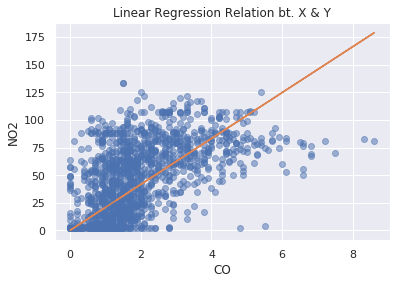

[[1. ]
 [0.7]
 [1.1]
 ...
 [1.1]
 [1.2]
 [1.3]]


In [6]:
predictions = x* beta # making use of numpy's broadcast
predictions_withouth_intercept = predictions

ax = sns.regplot(x=x, y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='CO', 
       ylabel='NO2',
       title='Linear Regression Relation bt. X & Y');
plt.plot(x, predictions) # overlay a line plot over a scatter plot 
plt.show()
print(x)

(1361,)
(1361,)
Estimated coefficients: [22.08067686 13.00532788]
Old shape of coefficients array: (2,)
New shape of coefficients array: (2, 1)


/home/oran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if sys.path[0] == '':


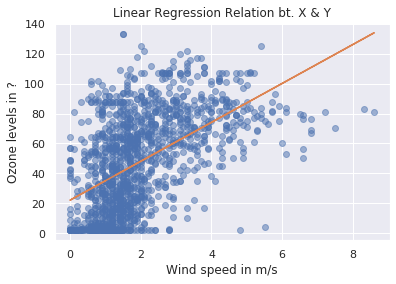

In [7]:
x=df2['WSPM'].to_numpy()
y=df2['O3'].to_numpy()

print(x.shape)
constant_term = np.ones(len(x)) 
# append constant term as a column of x
x = np.c_[constant_term, x]

print(y.shape)


beta = np.linalg.lstsq(x, y)[0]
print('Estimated coefficients:', beta)

# to use the dot product function we have to state that the coefficients vector is of the shape (2,1)
print('Old shape of coefficients array:',beta.shape)
beta = np.reshape(beta,(-1,1))
print('New shape of coefficients array:',beta.shape)

# compute new predictions
predictions_with_intercept = dot(x,beta) 

ax = sns.regplot(x=x[:,1], y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='Wind speed in m/s', 
       ylabel='Ozone levels in ?',
       title='Linear Regression Relation bt. X & Y');
plt.plot(x[:,1], predictions_with_intercept) # overlay a line plot over a scatter plot 
plt.show()

In [8]:
### SSTotal
def ss_total(y):
    mean=np.mean(y)
    total= np.sum((y-mean)**2)
    return total

### SSResiduals & SSErrors
# Watch out for broadcast effects
# y shape is (209,) and predictions shape is (209,1)
# shapes have to agree when using element-wise operations in numpy

# The regression sum of squares, also called the explained sum of squares:
def ss_reg(pred, y):
    mean= np.mean(y)
    ssr= np.sum((pred-mean)**2)
    return ssr

# The sum of squares of residuals, also called the residual sum of squares:
def ss_res(pred, y):
    sst=np.sum((pred-y)**2)
    return sst

y = np.reshape(y,(-1,1))
# SStotal
sstotal = ss_total(y)

# We could also obtain SStotal using the target's variance
# don't forget to get an unbiased estimate of the variance 
ss_total_using_variance = (len(y) - 1 ) * np.var(y, ddof=1) 

# SSReg
ssreg = ss_reg(predictions_with_intercept, y)

# SSRes
ssres = ss_res(predictions_with_intercept, y)

### R^2
rsq_with_intercept = 1 - (ssres / sstotal)


print('SStotal:', round(sstotal,4))
print('SSreg:', round(ssreg,4))
print('SSres:', round(ssres,4))

print('Coefficient of Determinacy, model with intercept:', np.round(rsq_with_intercept,2))

SStotal: 1422247.2873
SSreg: 393435.3509
SSres: 1028811.9364
Coefficient of Determinacy, model with intercept: 0.28


In [9]:
print(y.shape)

(1361, 1)


(1361, 1)
(1361,)


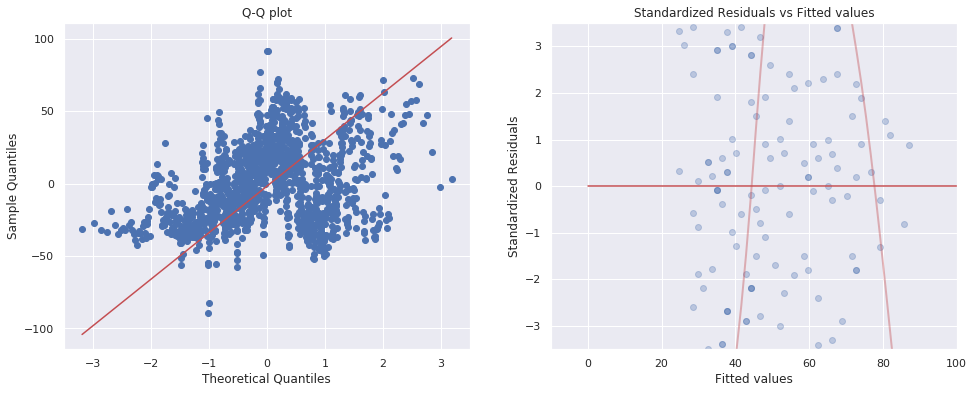

In [10]:
fig, axs = plt.subplots(ncols=2, # Set the number of columns to split the figure in
                        figsize=(16, 6)) # size of the whole figure

# re-computing our model values
predictions = dot(x,beta)
#residuals = y - predictions[:,0]
residuals = y - predictions
degrees_of_freedom = len(y) - x.shape[1]

sm.qqplot(residuals, 
          stats.t,
          distargs=(degrees_of_freedom,), 
          line='q', 
          ax=axs[0])
axs[0].set_title(label = 'Q-Q plot')
axs[0].set_xlim(-3.5,3.5)

#residuals_standard_error = np.sqrt(ssres/(len(x)-1-1))
residuals_standard_error = np.sqrt((1/degrees_of_freedom)*np.sum(residuals**2))
#mean_independent_variable = np.sum(x)/len(x)
mean_independent_variable = np.mean(x[:,1])

leverage = (1/len(x))+(((x[:,1]-mean_independent_variable)**2)/(np.sum((x[:,1]-mean_independent_variable)**2)))
standardized_rediduals = np.divide(residuals[:,0],(np.sqrt(1-leverage)))
predictions = np.reshape(predictions, (-1,1))

print(predictions.shape)
print(standardized_rediduals.shape)
sns.regplot(x=predictions[:,0], 
            y=standardized_rediduals, 
            ax=axs[1],
            lowess=True, 
            scatter_kws={'alpha':0.3}, 
            line_kws={"color":"r","alpha":0.4,"lw":2})
plt.plot(np.arange(len(standardized_rediduals)), [0]*len(standardized_rediduals), 'r-')
axs[1].set_ylim(-3.5,3.5)
axs[1].set_xlim(-10.0,100.0)

axs[1].set(ylabel='Standardized Residuals', 
           xlabel='Fitted values');
axs[1].set_title(label = 'Standardized Residuals vs Fitted values');

**c)** *Take the natural log of both of the variables and perform a linear regression on the transformed features. Obtain a normal probability plot of the standardized residuals from this regression. Discuss if this probability plot indicates an acceptable level of normality?*

In [11]:
x=df2['WSPM'].to_numpy()
x=np.reshape(x,(-1,1))
y=df2['O3'].to_numpy()
print(x.shape)
print(y.shape)
mask = y != 0
y_masked = y[mask]
print(y_masked)
x_masked = x[mask]
print(x_masked)
y_masked = np.log(y_masked)


(1361, 1)
(1361,)
[ 4.  4.  4. ... 58. 35. 42.]
[[1. ]
 [0.7]
 [1.1]
 ...
 [1.1]
 [1.2]
 [1.3]]


Estimated coefficients: [1.33466911]
Estimated coefficients: [1.33466911]


/home/oran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


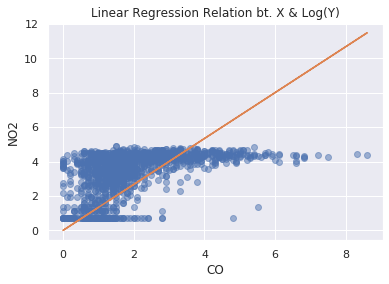

In [12]:
# estimate the coefficients
beta_log = np.linalg.lstsq(x_masked, y_masked)[0]
beta2_log = dot(dot(inv(dot(x_masked.T, x_masked)),x_masked.T),y_masked) 
print('Estimated coefficients:', beta_log)
print('Estimated coefficients:', beta2_log)

beta_log = np.reshape(beta_log,(-1,1))

# compute new predictions
predictions_log = dot(x_masked,beta_log) 

ax = sns.regplot(x=x_masked, y=y_masked, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='CO', 
       ylabel='NO2',
       title='Linear Regression Relation bt. X & Log(Y)');
plt.plot(x_masked, predictions_log) # overlay a line plot over a scatter plot 
plt.show()

#NORMAL DISTRIBUTION


(1361, 1)
Estimated coefficients: [2.52616222 0.44233399]
Old shape of coefficients array: (2,)
New shape of coefficients array: (2, 1)


/home/oran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


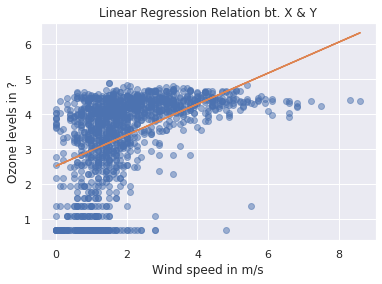

In [13]:

constant_term = np.ones(len(x_masked)) 
# append constant term as a column of x
x_masked = np.c_[constant_term, x_masked]

print(x.shape)


beta_log = np.linalg.lstsq(x_masked, y_masked)[0]
print('Estimated coefficients:', beta_log)

# to use the dot product function we have to state that the coefficients vector is of the shape (2,1)
print('Old shape of coefficients array:',beta_log.shape)
beta_log = np.reshape(beta_log,(-1,1))
print('New shape of coefficients array:',beta_log.shape)

# compute new predictions
predictions_with_intercept_log = dot(x_masked,beta_log) 

ax = sns.regplot(x=x_masked[:,1], y=y_masked, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='Wind speed in m/s', 
       ylabel='Ozone levels in ?',
       title='Linear Regression Relation bt. X & Y');
plt.plot(x_masked[:,1], predictions_with_intercept_log) # overlay a line plot over a scatter plot 
plt.show()

In [14]:
#y_masked = np.reshape(y_masked, (-1,1))
# SStotal
sstotal_log = ss_total(y_masked)

# We could also obtain SStotal using the target's variance
# don't forget to get an unbiased estimate of the variance 
ss_total_using_variance_log = (len(y_masked) - 1 ) * np.var(y_masked, ddof=1) 
# SSReg
ssreg_log = ss_reg(predictions_with_intercept_log[:,0], y_masked)
# SSRes
ssres_log = ss_res(predictions_with_intercept_log[:,0], y_masked)

### R^2
rsq_with_intercept_log = 1 - (ssres_log / sstotal_log)


print('SStotal:', round(sstotal_log,4))
print('SSreg:', round(ssreg_log,4))
print('SSres:', round(ssres_log,4))
print('Coefficient of Determinacy, model with intercept:', rsq_with_intercept_log)

SStotal: 2033.1591
SSreg: 455.1257
SSres: 1578.0333
Coefficient of Determinacy, model with intercept: 0.22385151616667542


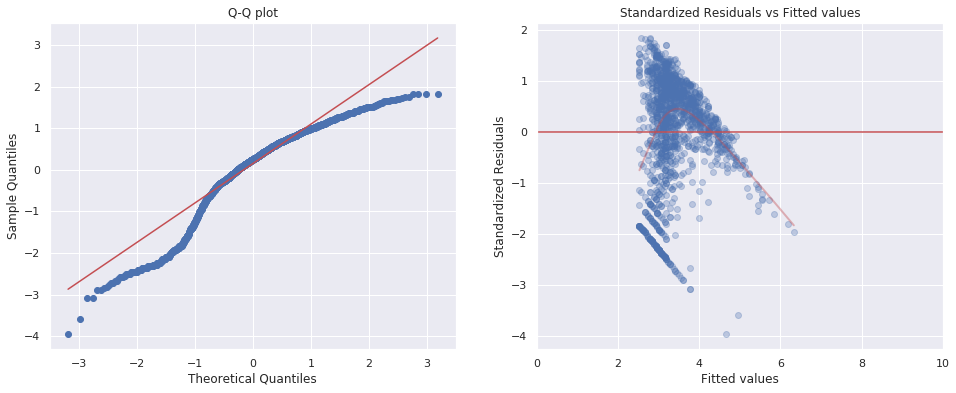

In [15]:
#x=x_masked
#y=y_masked
fig, axs = plt.subplots(ncols=2, # Set the number of columns to split the figure in
                        figsize=(16, 6)) # size of the whole figure

# re-computing our model values
predictions_log = dot(x_masked,beta_log)
residuals_log = y_masked - predictions_log[:,0]
#residuals = y - predictions
degrees_of_freedom_log = len(y_masked) - x_masked.shape[1]

sm.qqplot(residuals_log, 
          stats.t,
          distargs=(degrees_of_freedom_log,), 
          line='q', 
          ax=axs[0])
axs[0].set_title(label = 'Q-Q plot')
axs[0].set_xlim(-3.5,3.5)

#residuals_standard_error = np.sqrt(ssres/(len(x)-1-1))
residuals_standard_error_log = np.sqrt((1/degrees_of_freedom_log)*np.sum(residuals_log**2))
#mean_independent_variable = np.sum(x)/len(x)
mean_independent_variable_log = np.mean(x_masked[:,1])

leverage_log = (1/len(x_masked))+(((x_masked[:,1]-mean_independent_variable_log)**2)/(np.sum((x_masked[:,1]-mean_independent_variable_log)**2)))
standardized_rediduals_log = np.divide(residuals_log,(np.sqrt(1-leverage_log)))
predictions_log = np.reshape(predictions_log, (-1,1))

sns.regplot(x=predictions_log[:,0], 
            y=standardized_rediduals_log, 
            ax=axs[1],
            lowess=True, 
            scatter_kws={'alpha':0.3}, 
            line_kws={"color":"r","alpha":0.4,"lw":2})
plt.plot(np.arange(len(standardized_rediduals_log)), [0]*len(standardized_rediduals_log), 'r-')
#axs[1].set_ylim(-3.5,3.5)
axs[1].set_xlim(0.0,10.0)

axs[1].set(ylabel='Standardized Residuals', 
           xlabel='Fitted values');
axs[1].set_title(label = 'Standardized Residuals vs Fitted values');

**d)** *Write the population regression equation for your model. Interpret the meaning of the values of the parameters b0 and b1.*

In [16]:

# Linear regression equation: "Y= b0+ b1*x "
#calculate b1
# use x and y again? or use x_masked and y_masked
#calculate beta1 (ax=b)
print('ŷ''={}*x+{}'.format(beta_log[0][0],beta_log[1][0]))

ŷ=2.5261622200063836*x+0.4423339939345954


**e)** *Find the correlation and determinacy coefficients. Analyse and comment on the meaning of both.*

In [17]:
import numpy.ma as ma

x=df2['WSPM'].to_numpy()
x=np.reshape(x,(-1,1))
y=df2['O3'].to_numpy()
mask = y != 0
y_masked = y[mask]
x_masked = x[mask]
y_masked = np.log(y_masked)


constant_term_log = np.ones(len(x_masked)) 
# append constant term as a column of x
x_masked = np.c_[constant_term_log, x_masked]

print("Coefficient of Determination:",rsq_with_intercept_log)
print('Correlation:',np.sqrt(rsq_with_intercept_log))

print('Correlation:',np.corrcoef(y_masked,x_masked[:,1])[0,1])


Coefficient of Determination: 0.22385151616667542
Correlation: 0.47312949196459464
Correlation: 0.4731294919645947


**f)** *Test the statistical hypothesis for determining whether a linear relationship exists between the chosen variables.*

In [18]:
n = len(x_masked[:,1])
sigma_degrees_of_freedom = n - 2
# mean squared error
sigma_sqr = ssres_log/ sigma_degrees_of_freedom
variance_covmatrix = inv((np.matmul(x_masked.T,x_masked)))*sigma_sqr
coeff_stde = [np.sqrt(variance_covmatrix[0,0]),np.sqrt(variance_covmatrix[1,1])]
print('Coefficients\' Standard Errors:',coeff_stde)

Coefficients' Standard Errors: [0.05260404538767939, 0.02234256216525169]


In [19]:
expected_value = 0.0

# For each coefficient
for i in range(len(beta_log)):    
    ttest =np.divide(beta_log[i],coeff_stde[i])

    #Degrees of freedom
    df = x_masked.shape[0] - (i+1)
    # https://stats.stackexchange.com/a/140395
    
    pval = stats.t.sf(np.abs(ttest), df)*2  # two-sided pvalue = Prob(abs(t)>tt)
    # https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html#t-test-and-ks-test


    print('Test statistc for coefficient estimate ',i,':',ttest,'| P-value:', np.round(pval,8))

Test statistc for coefficient estimate  0 : [48.0222044] | P-value: [0.]
Test statistc for coefficient estimate  1 : [19.79781865] | P-value: [0.]


**g)** *Construct and interpret a 95% confidence interval for the unknown true slope of the regression line.*

In [20]:
df = x_masked.shape[0]- 2
print(df)
one_minus_alpha = 0.05
alpha = 0.95
t_student_values = stats.t.ppf( [one_minus_alpha/2, alpha+one_minus_alpha/2], df)
print(beta_log)
stde_beta0 = beta_log[0] + (t_student_values * coeff_stde)
stde_beta1 = beta_log[1] + (t_student_values * coeff_stde)
stde1 =beta_log[0]-(t_student_values*coeff_stde)[0]
stde2 =beta_log[0]+(t_student_values*coeff_stde)[0]
stde3 =beta_log[1]-(t_student_values*coeff_stde)[1]
stde4 =beta_log[1]+(t_student_values*coeff_stde)[1]


stde=[[stde1[0],stde2[0]],[stde3[0],stde4[0]]]
stde_t = np.asarray([(stde_beta0[:]), (stde_beta1[:])])

print('Stde:',stde)
print('Stde:\n',stde_t)

1359
[[2.52616222]
 [0.44233399]]
Stde: [[2.629356160506915, 2.4229682795058523], [0.39850434141037316, 0.4861636464588176]]
Stde:
 [[2.42296828 2.56999187]
 [0.33914005 0.48616365]]


**h)** *Construct a 95% confidence interval for the population correlation coefficient. Interpret the results.*

In [24]:
#formula for true rho confidence interval:
#r+-t_a/2,n-2 * sqrt((1-r²)/(n-2))
rho_interval = np.sqrt(rsq_with_intercept_log)\
             + t_student_values * np.sqrt((1-rsq_with_intercept_log)/df)
print(np.sqrt(rsq_with_intercept_log))
print(rho_interval)


0.47312949196459464
[0.4262484  0.52001059]


**i)** *Construct and interpret a 95% confidence interval for the mean of the y‐variable at a fixed value of your choice of the other variable. Interpret your result and indicate if the prediction interval is useful.*

In [22]:
y_mean= np.mean(y_masked)
print('Y_mean',y_mean)
x_static=x_masked[1,1]
x_mean=np.sum(x_masked[:,1]) / len(x_masked[:,1])
print('X_static',x_static)

df_y = y_masked.shape[0] - 2
one_minus_alpha_y = 0.05
alpha_y = 0.95
t_student_values_y = stats.t.ppf( [(1+alpha)/2], df)

sse=np.sum((y_masked-y_mean)**2)
s=np.sqrt(sse/len(y_masked))
print(s)


result1=y_mean-t_student_values_y*s*np.sqrt(1/(len(y_masked))+(x_static-x_mean)**2/np.sum((x_masked[:,1]-x_mean)**2))
result2=y_mean+t_student_values_y*s*np.sqrt(1/(len(y_masked))+(x_static-x_mean)**2/np.sum((x_masked[:,1]-x_mean)**2))
result=[result1[0],result2[0]]
print(result)



Y_mean 3.3923048312008706
X_static 0.7
1.2222403530847608
[3.3021051227699, 3.482504539631841]


**j)** *Construct and interpret a 95% confidence interval for a randomly chosen value of the y‐variable at a fixed value of your choice of the other variable. Interpret your result and indicate if the prediction interval is useful.*

In [23]:
y_mean= np.mean(y_masked)
print('Y_mean',y_mean)
x_static=x_masked[1,1]
x_mean=np.sum(x_masked[:,1])
print('X_static',x_static)
y_random = y_masked[np.random.randint(0, len(y_masked))]
df_y = y_masked.shape[0]- 2
one_minus_alpha_y = 0.05
alpha_y = 0.95
t_student_values_y = stats.t.ppf( [(1+alpha)/2], df)

sse=np.sum((y_masked-y_mean)**2)
s=np.sqrt(sse/len(y_masked))
print(s)

# it was np.sqrt(1 + 1/n ...) why 1+ ? changes the result significantly
result1=y_mean-t_student_values_y*s*np.sqrt(1/(len(y_masked))+(x_static-x_mean)**2/np.sum((x_masked[:,1]-x_mean)**2))
result2=y_mean+t_student_values_y*s*np.sqrt(1/(len(y_masked))+(x_static-x_mean)**2/np.sum((x_masked[:,1]-x_mean)**2))
result=[result1[0],result2[0]]
print(result)
result1_alt=y_random-t_student_values_y*s*np.sqrt(1/(len(y_masked))+(x_static-x_mean)**2/np.sum((x_masked[:,1]-x_mean)**2))
result2_alt=y_random+t_student_values_y*s*np.sqrt(1/(len(y_masked))+(x_static-x_mean)**2/np.sum((x_masked[:,1]-x_mean)**2))
result=[result1_alt[0],result2_alt[0]]
print(result)


Y_mean 3.3923048312008706
X_static 0.7
1.2222403530847608
[3.3003699819656642, 3.484239680436077]
[4.302514305437232, 4.486384003907646]
